# Covid_Classification
Un classificateur covid a été utilisé pour classer les images de radiographie X-RAY (COVID, NORMAL).

Le modèle est entrainé en utilisant une base des données de radiographie sur Covid-19 disponible sur kaggle.



In [1]:
# Importation des bibliothèques nécessaires
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## 2.Pretraitement des données 

In [2]:
# Chemin vers les dossiers de données (images et annotations)
data_dir = 'C:/Users/USER/Documents/Nouveau dossier/Master IA/Computer Vision/Projet_Covid_CV/xray_data/'




In [3]:
print(os.path.exists(data_dir))  # retourne True si le chemin existe

True


In [4]:
# consulter les dossier qui sont a l'intérieur du chemin
os.listdir(data_dir)

['COVID', 'NORMAL']

In [5]:
# Calculer les poids de classe
#Nombre total d'images covid = 3616
#Nombre total d'images normal = 10192
total_samples = 3616 + 10192  # Total des échantillons
weight_covid = total_samples / (2 * 3616)
weight_normal = total_samples / (2 * 10192)

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Utiliser le générateur pour créer des ensembles d'entraînement et de validation
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training' 
)

test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'  
)


Found 11047 images belonging to 2 classes.
Found 2761 images belonging to 2 classes.


In [6]:
len(train_generator)

346

# 2.Analyse exploratoire des données

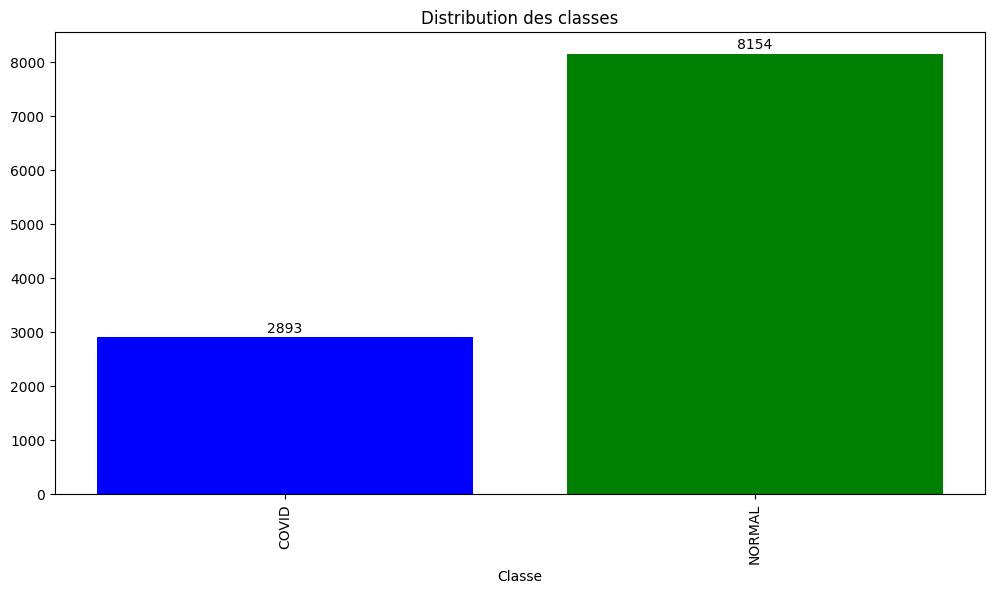

In [7]:
# Explorez la distribution des classes pour vous assurer que les données sont équilibrées
plt.figure(figsize=(12, 6))
unique, counts = np.unique(train_generator.classes, return_counts=True)

# Définir des couleurs différentes pour chaque barre
colors = ['blue', 'green']  # Ajoutez autant de couleurs que de classes

plt.bar(unique, counts, color=colors)
plt.title('Distribution des classes')
plt.xlabel('Classe')

# Ajouter les libellés des classes
class_labels = list(train_generator.class_indices.keys())
plt.xticks(unique, class_labels, rotation='vertical')

# Ajouter les étiquettes des valeurs dessus des barres
for i, count in enumerate(counts):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()

In [8]:
train_generator[0]

(array([[[[4.74036872e-01, 4.74036872e-01, 4.74036872e-01],
          [4.72480029e-01, 4.72480029e-01, 4.72480029e-01],
          [4.74876910e-01, 4.74876910e-01, 4.74876910e-01],
          ...,
          [7.95756746e-03, 7.95756746e-03, 7.95756746e-03],
          [6.75385678e-03, 6.75385678e-03, 6.75385678e-03],
          [5.93956793e-03, 5.93956793e-03, 5.93956793e-03]],
 
         [[4.18177009e-01, 4.18177009e-01, 4.18177009e-01],
          [4.17250097e-01, 4.17250097e-01, 4.17250097e-01],
          [3.96587849e-01, 3.96587849e-01, 3.96587849e-01],
          ...,
          [2.52746604e-03, 2.52746604e-03, 2.52746604e-03],
          [2.52746604e-03, 2.52746604e-03, 2.52746604e-03],
          [2.52746604e-03, 2.52746604e-03, 2.52746604e-03]],
 
         [[4.17623401e-01, 4.17623401e-01, 4.17623401e-01],
          [4.21554208e-01, 4.21554208e-01, 4.21554208e-01],
          [3.75080913e-01, 3.75080913e-01, 3.75080913e-01],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.0000

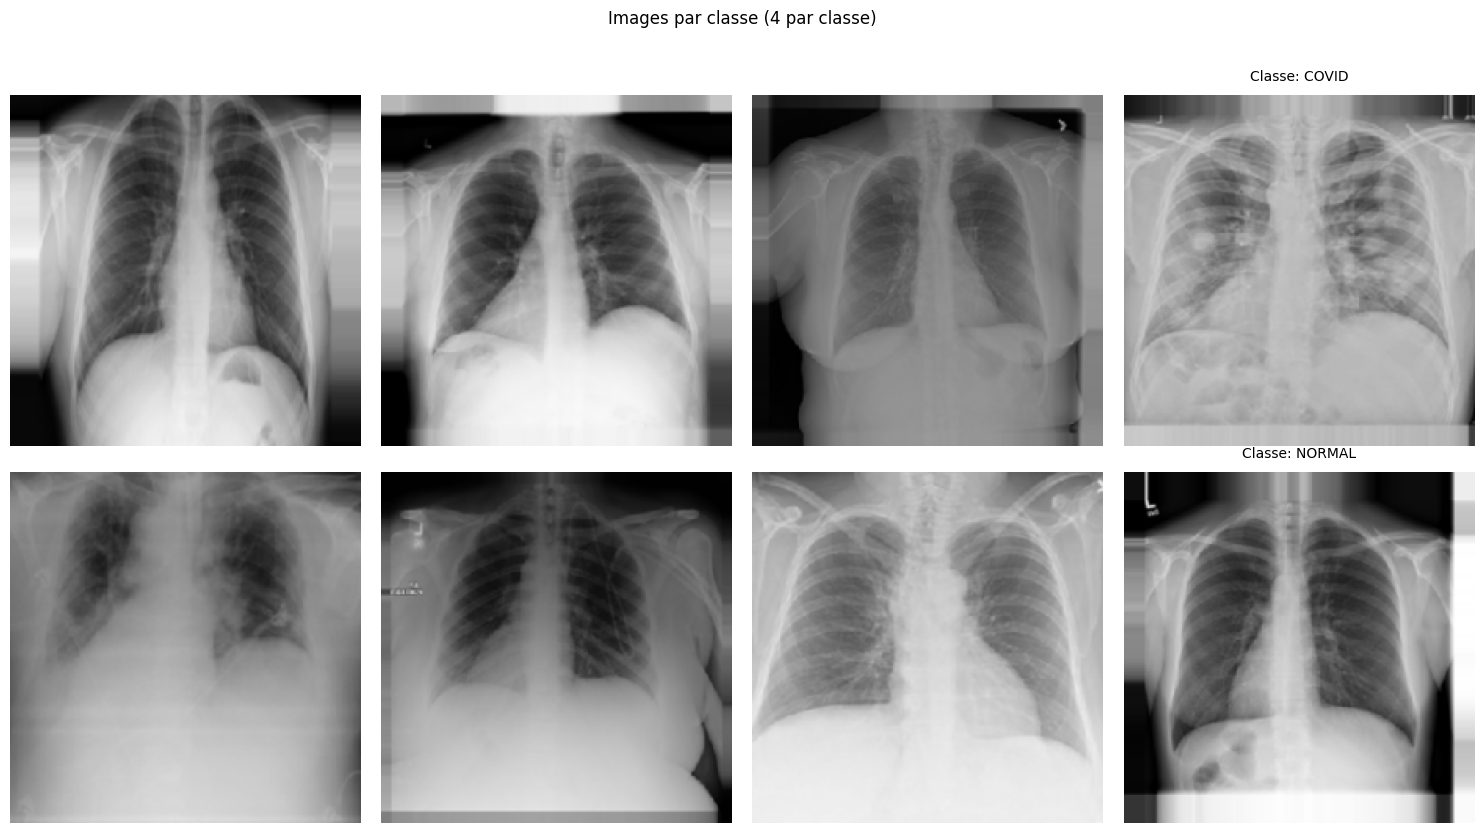

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Obtenez un échantillon d'images par classe
class_labels = list(train_generator.class_indices.keys())

# Ajustez la taille des sous-graphiques et limitez le nombre d'images affichées par classe
num_images_per_class = 4
num_classes_to_display = 5  # Changer ceci en fonction de vos préférences

# Ajustez la taille du graphique en fonction du nombre d'images et de la taille souhaitée des sous-graphiques
plt.figure(figsize=(15, num_classes_to_display * 4))

for i, class_label in enumerate(class_labels[:num_classes_to_display]):
    # Sélectionnez les images de la classe actuelle
    class_indices = np.where(train_generator.classes == train_generator.class_indices[class_label])[0]

    # Utilisez le générateur pour obtenir des images et des labels
    class_images, _ = train_generator.next()

    # Limitez le nombre d'images affichées par classe
    class_images = class_images[:num_images_per_class]

    # Affichez les images dans une grille
    for j in range(num_images_per_class):
        plt.subplot(num_classes_to_display, num_images_per_class, i * num_images_per_class + j + 1)
        plt.imshow(class_images[j])
        plt.axis('off')

    # Ajoutez un titre pour indiquer la classe
    plt.suptitle(f"Images par classe ({num_images_per_class} par classe)")
    plt.title(f"Classe: {class_label}", fontsize=10, y=1.02)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # Réduisez l'espace entre le titre et les sous-graphiques
plt.show()


## 3.Construction du modèle CNN

In [10]:
#Initializing CNN
classifier = Sequential()

#1Convolution
classifier.add(Convolution2D(32,3,3,input_shape = (224,224,3), activation = 'relu'))

#2Pooling
classifier.add(AveragePooling2D(pool_size=(4, 4)))

#adding 2nd 3rd and 4th convolution layer
classifier.add(Convolution2D(32,3,3, activation = 'relu'))
classifier.add(AveragePooling2D(pool_size=(4, 4)))


#3Flattening
classifier.add(Flatten())

#4Full_Connection

classifier.add(Dense(32,activation = 'relu'))

classifier.add(Dense(64,activation = 'relu'))

classifier.add(Dense(128,activation = 'relu'))
classifier.add(Dense(256,activation = 'relu'))
classifier.add(Dense(256,activation = 'relu'))

classifier.add(Dense(1,activation = 'sigmoid'))

#Compiling CNN
classifier.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])


In [11]:
# Afficher la structure du modèle
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 74, 74, 32)        896       
                                                                 
 average_pooling2d (Average  (None, 18, 18, 32)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 average_pooling2d_1 (Avera  (None, 1, 1, 32)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 32)                1

## 4.Entraînement et Évaluation du modèle

In [12]:
# Entraînement du modèle
history= classifier.fit_generator(train_generator,
                         epochs = 2,
                         validation_data =test_generator,
                         class_weight={0: weight_covid, 1: weight_normal} # Weighted Loss : Pendant l'entraînement, nous attribuons des poids différents aux classes en fonction de leur fréquence. Les classes moins fréquentes auront un poids plus élevé.
                         )

C:\Users\USER\AppData\Local\Temp\ipykernel_30732\4250127713.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history= classifier.fit_generator(train_generator,


Epoch 1/2
346/346 [==============================] - 238s 683ms/step - loss: 0.6929 - accuracy: 0.5210 - val_loss: 0.6748 - val_accuracy: 0.6907
Epoch 2/2
346/346 [==============================] - 185s 533ms/step - loss: 0.6699 - accuracy: 0.5649 - val_loss: 0.6586 - val_accuracy: 0.5538


In [13]:
# Évaluation du modèle sur l'ensemble de test
test_loss, test_acc = classifier.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {test_acc}")

87/87 [==============================] - 36s 409ms/step - loss: 0.6619 - accuracy: 0.5422
Test Accuracy: 0.5421948432922363


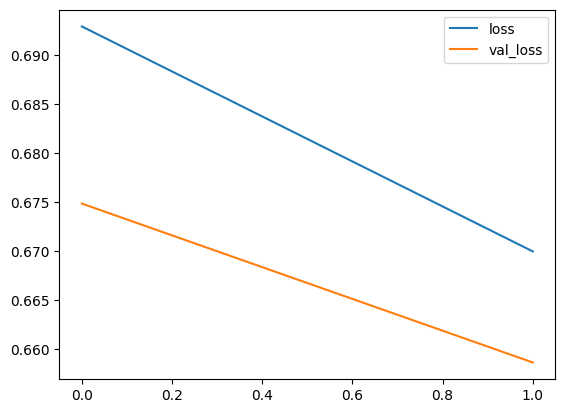

In [14]:
import pandas as pd
# Affichons les courbes d'apprentissage
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

## 5. Predictions

In [15]:
#Récupérer quelques images et labels de test
test_generator.reset()
batch = next(test_generator)
images, true_labels = batch[0], batch[1]

In [16]:
# Prédictions
predictions_batch = classifier.predict(images)
predicted_labels = np.where(predictions_batch > 0.5, 1, 0)

1/1 [==============================] - 0s 191ms/step


## 6. Visualisations de quelques predictions

1/1 [==============================] - 0s 37ms/step


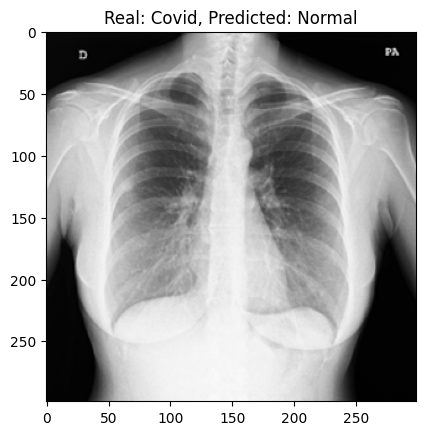

1/1 [==============================] - 0s 33ms/step


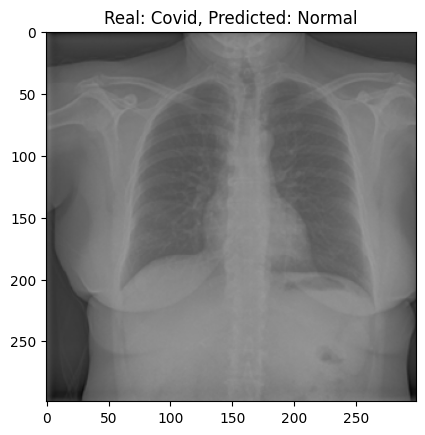

1/1 [==============================] - 0s 27ms/step


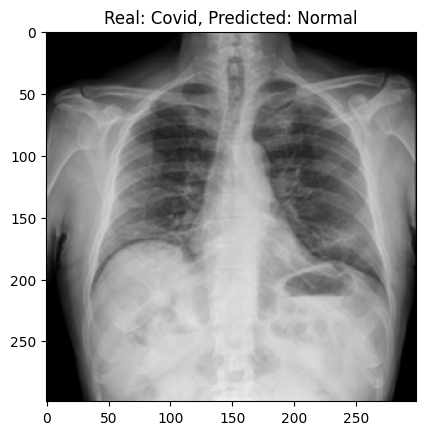

1/1 [==============================] - 0s 25ms/step


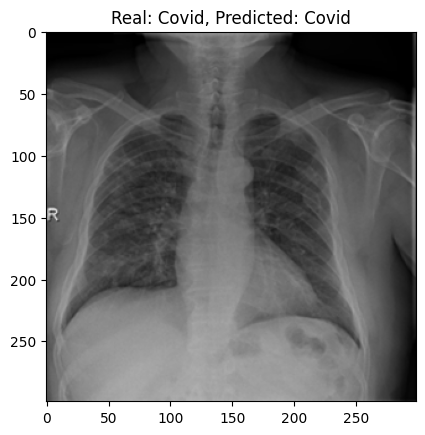

1/1 [==============================] - 0s 31ms/step


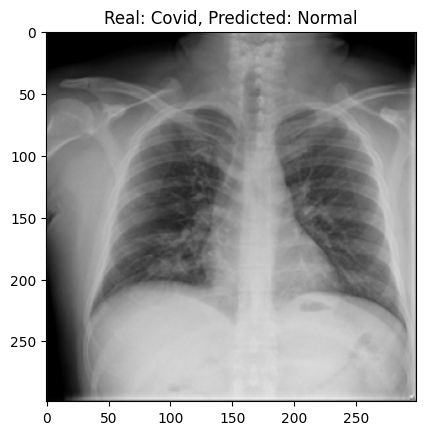

1/1 [==============================] - 0s 32ms/step


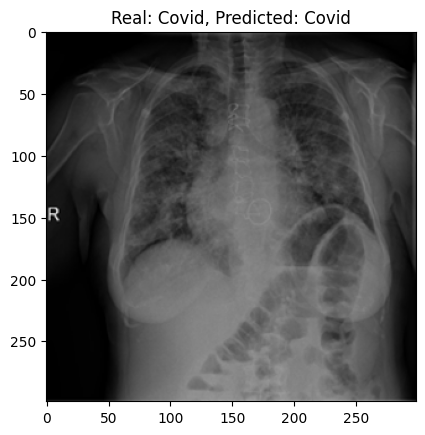

1/1 [==============================] - 0s 27ms/step


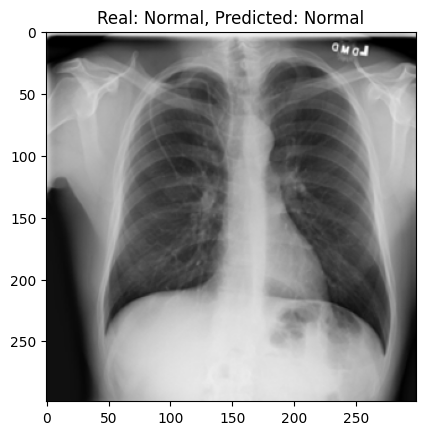

1/1 [==============================] - 0s 27ms/step


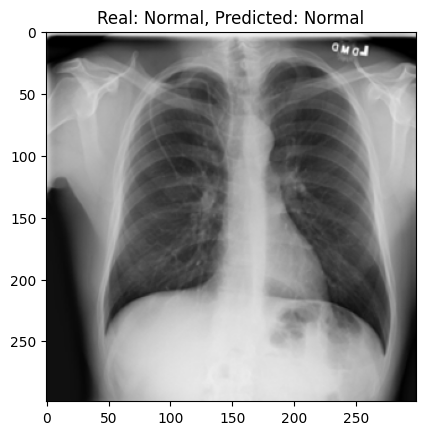

1/1 [==============================] - 0s 24ms/step


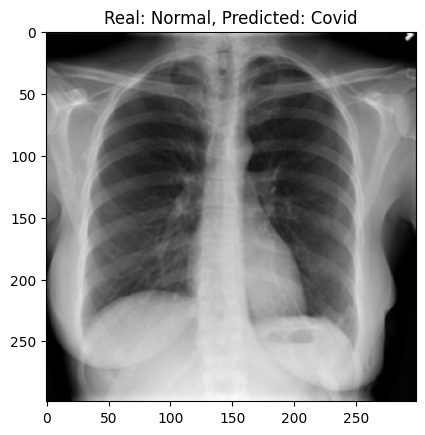

1/1 [==============================] - 0s 30ms/step


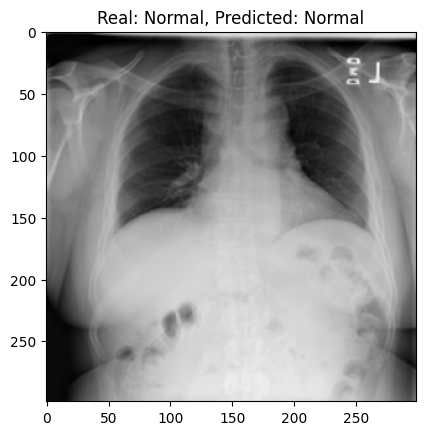

1/1 [==============================] - 0s 38ms/step


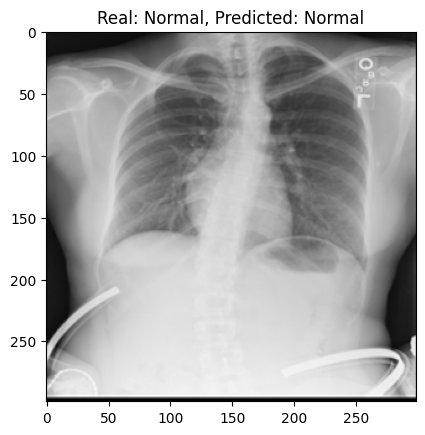

1/1 [==============================] - 0s 25ms/step


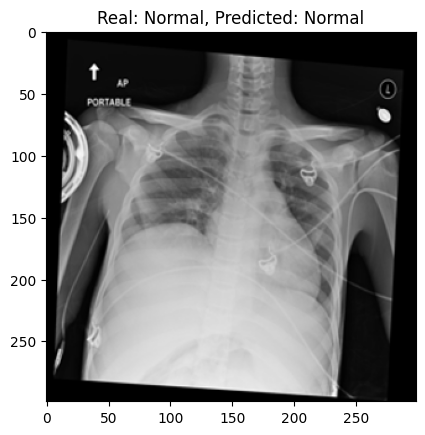

In [19]:
from keras.preprocessing import image

# Charger quelques images de la classe "covid"
covid_images = ["C:/Users/USER/Documents/Nouveau dossier/Master IA/Computer vision/Projet_Covid_CV/xray_data/COVID/COVID-2791.png", "C:/Users/USER/Documents/Nouveau dossier/Master IA/Computer vision/Projet_Covid_CV/xray_data/COVID/COVID-3614.png", "C:/Users/USER/Documents/Nouveau dossier/Master IA/Computer vision/Projet_Covid_CV/xray_data/COVID/COVID-2923.png", "C:/Users/USER/Documents/Nouveau dossier/Master IA/Computer vision/Projet_Covid_CV/xray_data/COVID/COVID-3001.png", "C:/Users/USER/Documents/Nouveau dossier/Master IA/Computer vision/Projet_Covid_CV/xray_data/COVID/COVID-3223.png", "C:/Users/USER/Documents/Nouveau dossier/Master IA/Computer vision/Projet_Covid_CV/xray_data/COVID/COVID-3464.png"]

# Charger quelques images de la classe "normal"
normal_images = ["C:/Users/USER/Documents/Nouveau dossier/Master IA/Computer vision/Projet_Covid_CV/xray_data/NORMAL/Normal-9004.png", "C:/Users/USER/Documents/Nouveau dossier/Master IA/Computer vision/Projet_Covid_CV/xray_data/NORMAL/Normal-9004.png", "C:/Users/USER/Documents/Nouveau dossier/Master IA/Computer vision/Projet_Covid_CV/xray_data/NORMAL/Normal-9244.png", "C:/Users/USER/Documents/Nouveau dossier/Master IA/Computer vision/Projet_Covid_CV/xray_data/NORMAL/Normal-9523.png", "C:/Users/USER/Documents/Nouveau dossier/Master IA/Computer vision/Projet_Covid_CV/xray_data/NORMAL/Normal-9724.png", "C:/Users/USER/Documents/Nouveau dossier/Master IA/Computer vision/Projet_Covid_CV/xray_data/NORMAL/Normal-9991.png"]

# Prétraiter les images
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  # Normalisation
    return img_array

# Effectuer les prédictions sur les images covid
for img_path in covid_images:
    img_array = preprocess_image(img_path)
    prediction = classifier.predict(img_array)
    predicted_label = "Covid" if prediction[0][0] > 0.5 else "Normal"  # Utilisez le seuil de 0.5
    plt.imshow(image.load_img(img_path))
    plt.title(f"Real: Covid, Predicted: {predicted_label}")
    plt.show()

# Effectuer les prédictions sur les images normal
for img_path in normal_images:
    img_array = preprocess_image(img_path)
    prediction = classifier.predict(img_array)
    predicted_label = "Covid" if prediction[0][0] > 0.5 else "Normal"  # Utilisez le seuil de 0.5
    plt.imshow(image.load_img(img_path))
    plt.title(f"Real: Normal, Predicted: {predicted_label}")
    plt.show()

## Save the model

In [20]:
classifier.save("C:/Users/USER/Documents/Nouveau dossier/Master IA/Computer vision/Projet_Covid_CV/model/covid_classifier.h5")